<h1 style="color:#2192f1" align="center"> LINEAR REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [2]:
df_train = pd.read_csv("data/randomly_generated/train.csv")
df_test = pd.read_csv("data/randomly_generated/test.csv")

In [3]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
df_train["y"].isnull().sum()
# Drop the rows where at least one element is missing
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

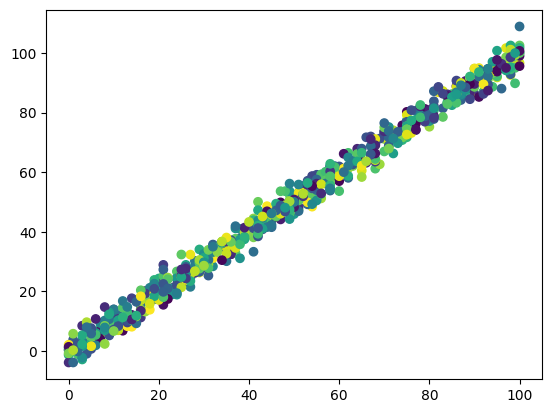

In [5]:
colors = np.random.uniform(15, 80, len(df_train["x"]))
fig, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], c=colors)

In [135]:
X = df_train["x"].values.reshape(-1, 1)
y = df_train["y"].values.reshape(-1, 1)

<h2 align="center" style="color:#f0e912">TRAINING</h2>


In [136]:
i_term = np.ones((len(X), 1))

In [137]:
X = np.concatenate((i_term, X), axis=1)

In [138]:
w = np.zeros((X.shape[1], 1))

In [139]:
def h_function(x):
    return (w.T @ x).item()

In [140]:
def error(i):
    return h_function(X[i]) - y[i]

In [141]:
def cost_function():
    return np.sum([error(i) ** 2 for i in range(len(X))]) / len(X)

In [142]:
def gradient_descent(epsilon=0.001, n=100, type="BGD", alpha=0.0001):
    global w
    if type == "BGD":
        cost = cost_function()
        for _ in range(n):
            for j in range(len(w)):
                grad = np.sum([error(i) * X[i][j] for i in range(len(X))])
                w[j] = w[j] - alpha * (grad / len(X))
            new_cost = cost_function()
            # print(f"Old cost function: {cost}")
            # print(f"New cost function: {new_cost} \n")
            difference = abs(new_cost - cost)
            if  difference < epsilon:
                print("Convergence!")
                break
            else:
                cost = new_cost
        print(f"weights : {w}")


In [143]:
gradient_descent()

Convergence!
weights : [[0.01490042]
 [0.99838285]]


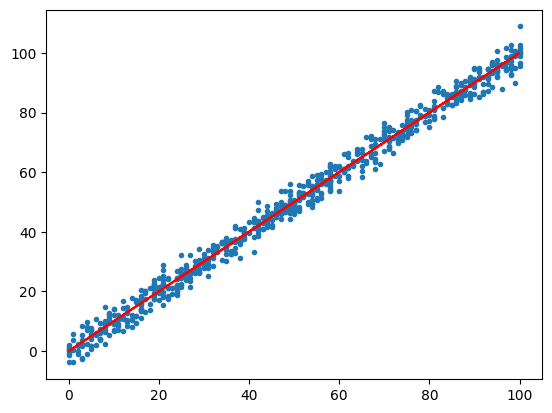

In [144]:
image = np.array([h_function(x) for x in X])
fig, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], marker='.')
ax.plot(image, image, color="red")